<a href="https://colab.research.google.com/github/ShreyJais/ML-MSc_AIML/blob/main/Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("/content/drive/MyDrive/ML/spam.csv")

In [31]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
df.isna().sum()

Category    0
Message     0
dtype: int64

1. Data Overview Graph:

<Axes: xlabel='Category', ylabel='count'>

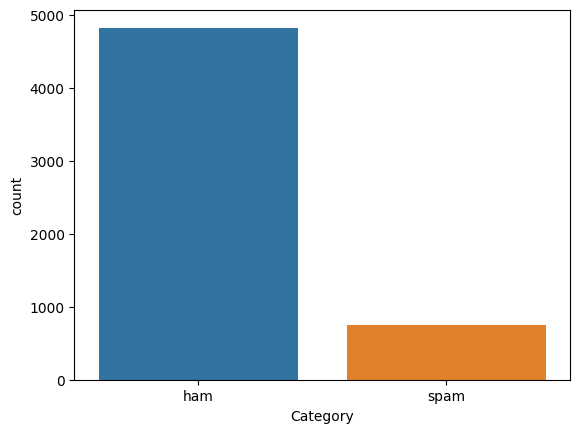

In [33]:
sns.countplot(x=df["Category"])
#class imbalance

In [34]:
df["Spam"] = df.Category.apply(lambda x : 1 if x=="spam" else 0)
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [35]:
import string
import nltk
from nltk.corpus import stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
nltk.download('stopwords')
ENGLISH_STOP_WORDS = stopwords.words('english')
ENGLISH_STOP_WORDS #removing stopwords like- not, don't, doesn't, wouldn't wont change the mening of a sentance?

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
#  and lowercase
def rm_punchuation(text : str):
  text = text.lower()  #lowercasing
  #it is reducing the performation of the model
  #text1 = " ".join([i for i in text.split() if  i not in ENGLISH_STOP_WORDS]) #remove stopwords
  text2 = "".join([i for i in text if  i not in string.punctuation]) #remove punchuation
  return(text2)
  #we won't use Stemming or Lemmatizing as dataset uses many un-known text abbreviation which might change the information.

In [38]:
" ".join([i for i in "123@#!$% a apple mango hadn't hadn't not to".split(" ") if  i not in ENGLISH_STOP_WORDS]) #remove stopwords #It should be giving me "123@#!$%"

'123@#!$% apple mango'

In [39]:
"hadn't" in ENGLISH_STOP_WORDS

True

In [40]:
rm_punchuation("123@#!$% HH hadn't hadn't not to")

'123 hh hadnt hadnt not to'

In [41]:
df["Message"] = df.Message.apply(rm_punchuation)
df.head()

,Category,Message,Spam
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


In [42]:
#train and test split
X=df.Message
y=df.Spam
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y)
#stratify is used for Class Balance

Naive Bayes
* Gaussian Naive Bayes - Assumes Gaussian (normal) distribution for continuous data.
* Multinomial Naive Bayes - Suitable for discrete data, often used in text classification.
* Complement Naive Bayes - Addresses imbalanced datasets.
* Bernoulli Naive Bayes - Designed for binary (Boolean) features.
* Categorical Naive Bayes - For categorical data with discrete categories.
* Out-of-core Naive Bayes Model Fitting - Fits models to large datasets.






feature_extraction from text
* CountVectorizer(*[, ...])

Convert a collection of text documents to a matrix of token counts.

* HashingVectorizer(*)

Convert a collection of text documents to a matrix of token occurrences.

* TfidfTransformer(*)

Transform a count matrix to a normalized tf or tf-idf representation.

* TfidfVectorizer(*[, ...])

Convert a collection of raw documents to a matrix of TF-IDF features.



In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline([
    ("Tfid", TfidfVectorizer()),
    ("Naive_Bayes", MultinomialNB(alpha=1)) #alpha= 1 indicate Laplace smoothing is being implimentated using alpha = 1
])

In [45]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Tfid', TfidfVectorizer()),
                ('Naive_Bayes', MultinomialNB(alpha=1))])

In [46]:
pipe.score(X_train,y_train)

0.9672425398249944

In [47]:
pipe.score(X_test,y_test)

0.9515695067264573

In [48]:
predictions = pipe.predict(X_test)

In [49]:
i = int(input("enter the index of X_test for input:\t"))
print("input:\t", list(X_test)[i])
print("predict:\t", predictions[i])
print("actual:\t", list(y_test)[i])

enter the index of X_test for input:	234
input:	 not planned yet going to join company on jan 5 onlydon know what will happen after that
predict:	 0
actual:	 0


2.Confusion Matrix Graph:

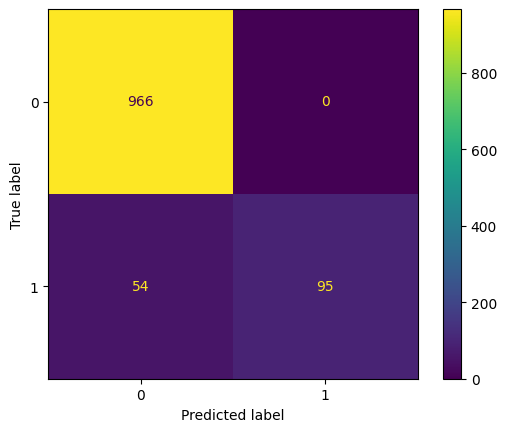

In [50]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

This model is best in minimise False-Positive i.e (ham will not be classfied as spam)

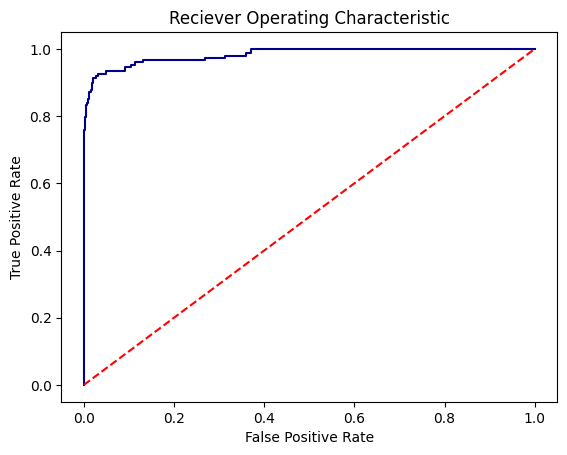

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='#00008B')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.show()

we can se Area Under the ROC Curve is high so the model performance is also high


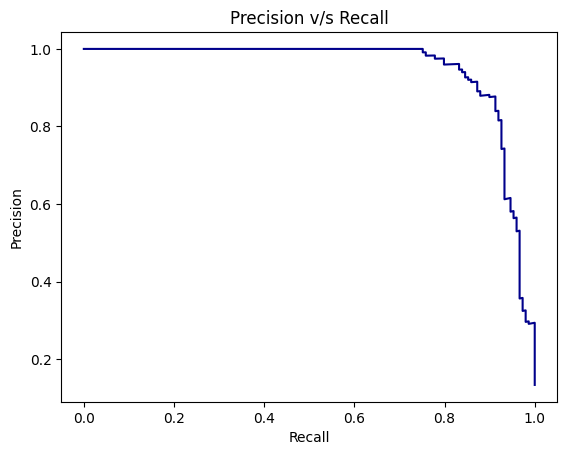

In [52]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, pipe.predict_proba(X_test)[:,1])
plt.plot(recall, precision, color='#00008B')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision v/s Recall')
plt.show()

we can se Area Under the Precision vs Recall Curve is high so the model performance is also high


In [53]:
pipe.predict_log_proba(X_test)

array([[-4.12282435e-03, -5.49327753e+00],
       [-1.80358072e+00, -1.79973983e-01],
       [-2.70033908e+00, -6.95459475e-02],
       ...,
       [-4.45097153e-03, -5.41685754e+00],
       [-3.45729047e-02, -3.38192165e+00],
       [-1.36920128e-02, -4.29778082e+00]])

In [54]:
pipe.predict_log_proba(X_test).shape

(1115, 2)

In [55]:
X_test.shape

(1115,)

In [56]:
pipe[0].get_feature_names_out().shape

(8403,)

In [57]:
pipe

Pipeline(steps=[('Tfid', TfidfVectorizer()),
                ('Naive_Bayes', MultinomialNB(alpha=1))])

In [58]:
#Due to use of TfidfVectorizer we get much. more feature then the predict_log_proba

In [60]:
# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

metrics = [
    accuracy_score(y_test, predictions),
    precision_score(y_test, predictions),
    recall_score(y_test, predictions),
    roc_auc_score(y_test, predictions)
]

metrics_it = iter(metrics)
metric_names = ['accuracy', 'precision', 'recall', 'roc_auc']

for _ in metric_names:
    print(f'For the given dataset, the {_} score using the trained model is {next(metrics_it)}')

For the given dataset, the accuracy score using the trained model is 0.9515695067264573
For the given dataset, the precision score using the trained model is 1.0
For the given dataset, the recall score using the trained model is 0.6375838926174496
For the given dataset, the roc_auc score using the trained model is 0.8187919463087248
